<h1 style='color: blue; font-size: 34px; font-weight: bold;'> Planejamento de Experimentos 
</h1>


# <font color='red' style='font-size: 30px;'>1.0 Introdução   </font>
<hr style='border: 2px solid red;'>




<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>    
<i> “Chamar um especialista em estatística depois que o experimento foi feito pode ser o mesmo que pedir para ele fazer um exame post-mortem. Talvez ele consiga dizer do que foi que o experimento morreu.”  </i>     
</p>    

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: right; text-indent: 0px;'>    
    <b>Sir Ronald Fisher</b>  

<hr>






# <font color='red' style='font-size: 30px;'> Introdução à análise de experimentos   </font>
<hr style='border: 2px solid red;'>

# <font color = 'purple'> Inserindo o experimento num Data Frame </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

## Importando as bibliotecas 

### Pandas

https://pandas.pydata.org/

In [1]:
import pandas as pd

### Numpy

http://www.numpy.org/

In [2]:
import numpy as np



<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Ensaios realizados na forma normalizada</b> 


<img width='800px' src='figuras/Figura_2.png'>

 
   
   
    


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
<font color="Blue"> Construindo uma matriz representando todos os ensaios realizados:


In [3]:
df = pd.DataFrame(data=[[1, 2, 3, 4], [-1, 1, -1, 1], [-1, -1, 1, 1], [19, 37, 24, 49]], index=['Ensaio', 'Farinha', 'Chocolate', 'Porções'])
df = df.transpose()
df

,Ensaio,Farinha,Chocolate,Porções
0,1,-1,-1,19
1,2,1,-1,37
2,3,-1,1,24
3,4,1,1,49


### pyDOE2

https://pypi.org/project/pyDOE2/

In [4]:
import pyDOE2 as doe

## Costruindo um planejamento fatorial de 2²


In [5]:
ensaios = doe.ff2n(2) #Farinha e Chocolate

In [6]:
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

## Incerindo o planejamento em um Data Frame

In [7]:
experimentos = pd.DataFrame(data=ensaios, columns=['Farinha', 'Chocolate'])

In [8]:
experimentos

,Farinha,Chocolate
0,-1.0,-1.0
1,1.0,-1.0
2,-1.0,1.0
3,1.0,1.0


### Inserindo coluna com os resultados 

In [9]:
experimentos['Porcoes'] = [19, 37, 24, 49]

In [10]:
experimentos

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49


<hr>
<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="Blue"> <b>Conclusão:</b> Temos, por fim, nosso experimento representado por um <i>DataFrame</i> do Pandas. Usaremos este <i>DataFrame</i> para iniciarmos a análise do nosso experimento. 
    
<hr>   

# <font color = 'purple'> Analisando graficamente o experimento   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

###  Importando o Seaborn

https://seaborn.pydata.org

In [11]:
import seaborn as sns

sns.set_palette('Oranges_r')
sns.set_style('darkgrid')

In [12]:
# paletas -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r


# estilo -> white, dark, whitegrid, darkgrid, ticks


### Para a farinha

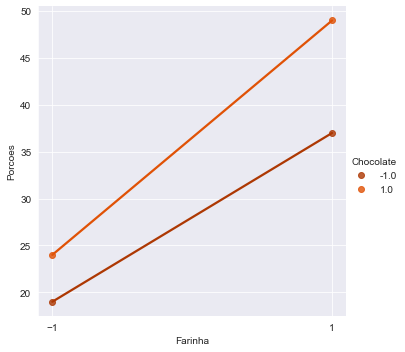

In [13]:
ax = sns.lmplot(data=experimentos, x='Farinha', y='Porcoes', hue='Chocolate', ci=None)
ax.set(xticks=[-1,1])
#Note que a farinha produz mais cupcakes quando temos mais chocolate

### Para o chocolate

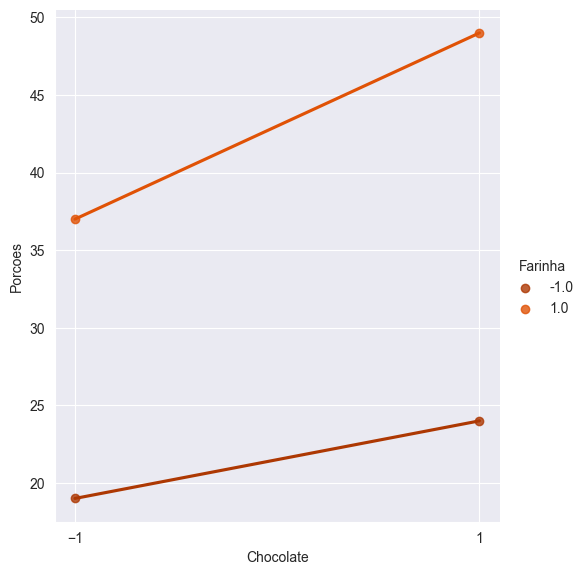

In [14]:
ax = sns.lmplot(data=experimentos, x='Chocolate', y='Porcoes', hue='Farinha', ci=0)
ax.figure.set_size_inches(6,6)
ax.ax.set_xticks(ticks=[-1,1])
ax
# A farinha parece aumentar a produção de cupcakes melhor que o chocolate.

# <font color = 'purple'> Ajustando o modelo estatístico </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>


### Bibliotecas  Stats Model
    https://www.statsmodels.org/dev/index.html


In [15]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

### .

In [16]:
modelo = smf.ols(data=experimentos, formula='Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')
# ~ é o sinal para =
# : é o sinal para a interação entre os componentes

In [17]:
modelo_ajustado = modelo.fit()

In [18]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Mon, 19 Sep 2022   Prob (F-statistic):                nan
Time:                        10:50:06   Log-Likelihood:                    inf
No. Observations:                   4   AIC:                              -inf
Df Residuals:                       0   BIC:                              -inf
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        na

c:\Users\leona\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\leona\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\leona\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:1749: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\leona\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\regression\linear_model.py:924: RuntimeWarning: divide by zero encountered in log
  llf = -nobs2*np.log(2*np.pi) - nobs2*np.log(ssr / nobs) - nobs2
c:\Users\

Intercepto = Média das Porções

Farinha, Chocolate e Farinha:Chocolate são respectivamente B1, B2, B3... Ou seja, os coeficientes da nossa fórmula


Note que a Farinha possui maior influência na quantidade de cupcakes

# <font color = 'purple'> Aumentando os Graus de liberdade  </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>



<p style='margin: 30px 30px;'>     
    


<hr>


<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>
    <font color="red"> <b>Replicatas no centro</b>


<img width='800px' src='figuras/Figura_5.png'> 


<p style='margin: 30px 30px;'> 
    
    
 
    

    
<hr>    

In [19]:
centro = np.array([[0,0,29], [0,0,30], [0,0,29], [0,0,30]])
centro

array([[ 0,  0, 29],
       [ 0,  0, 30],
       [ 0,  0, 29],
       [ 0,  0, 30]])

In [20]:
df_centro = pd.DataFrame(data=centro, columns=['Farinha', 'Chocolate', 'Porcoes'], index=[4,5,6,7])

In [21]:
df_centro

,Farinha,Chocolate,Porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


### .

In [22]:
experimentos = pd.concat(objs=[experimentos, df_centro], axis='index')

In [23]:
experimentos

,Farinha,Chocolate,Porcoes
0,-1.0,-1.0,19
1,1.0,-1.0,37
2,-1.0,1.0,24
3,1.0,1.0,49
4,0.0,0.0,29
5,0.0,0.0,30
6,0.0,0.0,29
7,0.0,0.0,30


# <font color = 'purple'>  Análise de significância estatística   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [24]:
modelo = smf.ols(data=experimentos, formula='Porcoes ~ Farinha + Chocolate + Farinha:Chocolate')

In [25]:
modelo_ajustado = modelo.fit()

In [26]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Mon, 19 Sep 2022   Prob (F-statistic):            0.00152
Time:                        10:50:08   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

c:\Users\leona\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


Como o P > |t| foi inferior a 0.05 rejeitamos a hipótese nula (de que B = 0), ou seja os parâmentros Intercepto, Farinha, Chocolate são estatisticamente significantes

A interação entre Farinha e Chocolate possui uma probilidade da hipótese nula ser verdadeira igual a 15,6%. Como não podemos rejeita-la ficamos com o resultado dessa variável não ser estatisticamente significante. Os intervalos de confiança mostram a mesma ideia

<p style='margin: 200px 200px;'>    


<hr>


    
 <img width='400px' src='figuras/Figura_6.png'> 


<p style='margin: 30px 30px;'>    

<hr>


 <img width='600px' src='figuras/Figura_7.png'> 


<p style='margin: 30px 30px;'>        
    
    
 <hr>   
    

  
 <img width='600px' src='figuras/Figura_10.png'> 


<p style='margin: 30px 30px;'>       
  
<hr>        


# <font color = 'purple'> Teste de significância estatística usando o <b>t<b>    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>





<hr>
<img width='600px' src='figuras/Figura_11.png'> 


<hr>
  <p style='margin: 30px 30px;'>     
<img width='900px' src='figuras/Figura_8.png'> 


<hr>



<p style='margin: 150px 150px;'>     
<img width='1000px' src='figuras/Figura_20.png'



<hr>
<p style='margin: 150px 150px;'>    

In [27]:
t_valores = modelo_ajustado.tvalues
t_valores

Intercept            43.494275
Farinha              10.708252
Chocolate             4.233495
Farinha:Chocolate     1.743204
dtype: float64

In [28]:
parametros = t_valores.index
parametros

Index(['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate'], dtype='object')

In [29]:
from scipy.stats import t 

In [30]:
t_limite = t.ppf(q = 1 - 0.025, df=4)
# Estamos admitindo um nível de sigificância de 0,05. Estou interessado no valor limite t de probabilidade das regiões da cauda
# df eh o graus de liberdade de resíduo do nosso modelo 

In [31]:
t_limite

2.7764451051977987

### .

### .


In [32]:
t_limite = [(t_limite) for i in range (0,4)]
t_limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

In [33]:
parametros = list(parametros)
parametros

['Intercept', 'Farinha', 'Chocolate', 'Farinha:Chocolate']

### Plotando o gráfico 

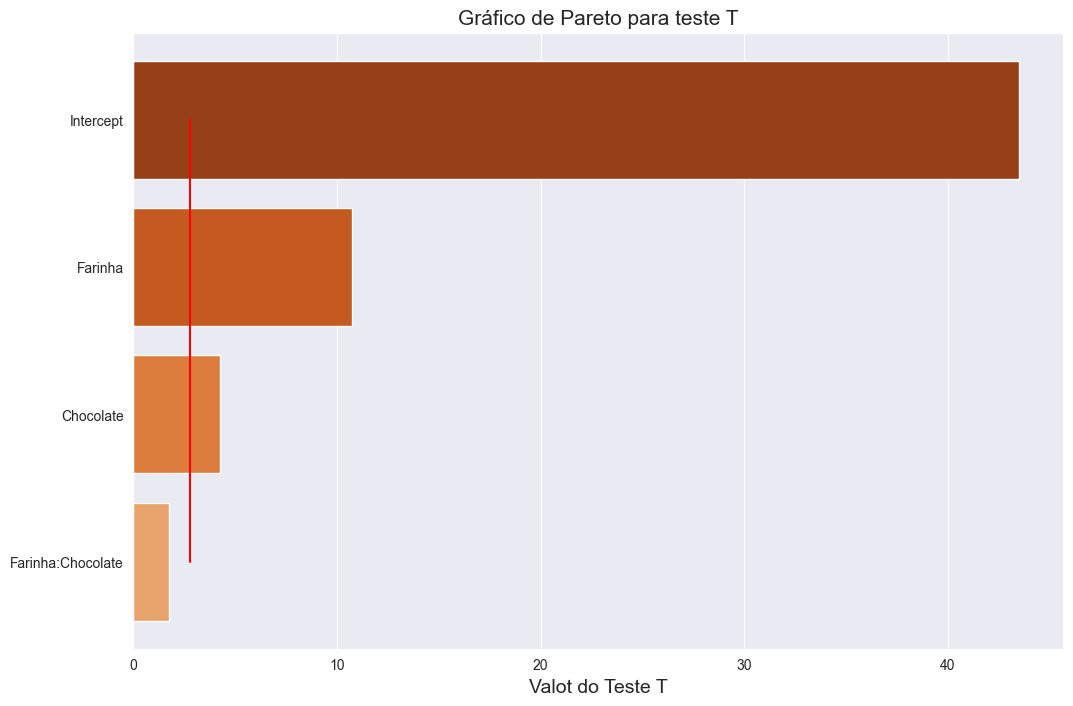

In [34]:
pareto = sns.barplot(x=t_valores, y=parametros)
pareto.plot(t_limite, parametros, color='r')
pareto.set_xlabel('Valot do Teste T', fontsize=14)
pareto.set_title('Gráfico de Pareto para teste T', fontsize=15)
pareto.figure.set_size_inches(12,8)

Novamente, agora pelo valor do teste t, temos que a interação da farinha com chocolate não é uma variável estatisticamente relevante. Ao contrário das outras 3 acima que são.

# <font color = 'purple'> Propondo um novo modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<hr>

<img width='800px' src='figuras/Figura_3.png'>

<p style='margin: 30px 30px;'> 

<hr>

<p style='margin: 200px 200px;'>


<hr>

<img width='600px' src='figuras/Figura_9.png'> 

<p style='font-size: 18px; line-height: 2; margin: 0px 0px; text-align: justify; text-indent: 0px;'>


<p style='margin: 30px 30px;'>

    
<hr>    


In [35]:
modelo_2 = smf.ols(data=experimentos, formula='Porcoes ~ Farinha + Chocolate')

In [36]:
modelo_2_adaptado = modelo_2.fit()

In [37]:
print(modelo_2_adaptado.summary())

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           0.000571
Time:                        10:50:10   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

c:\Users\leona\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<hr>

# <font color = 'purple'> Gráfico Padronizado de Pareto do novo modelo    </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


In [38]:
t_valores = modelo_2_adaptado.tvalues
t_valores

Intercept    36.658022
Farinha       9.025173
Chocolate     3.568092
dtype: float64

In [39]:
t_limite = t.ppf(q=1-0.025, df=5)
t_limite = [t_limite for i in range(0,3)]
t_limite

[2.5705818366147395, 2.5705818366147395, 2.5705818366147395]

### .

In [40]:
t_valores.index

Index(['Intercept', 'Farinha', 'Chocolate'], dtype='object')

### Plotando o gráfico

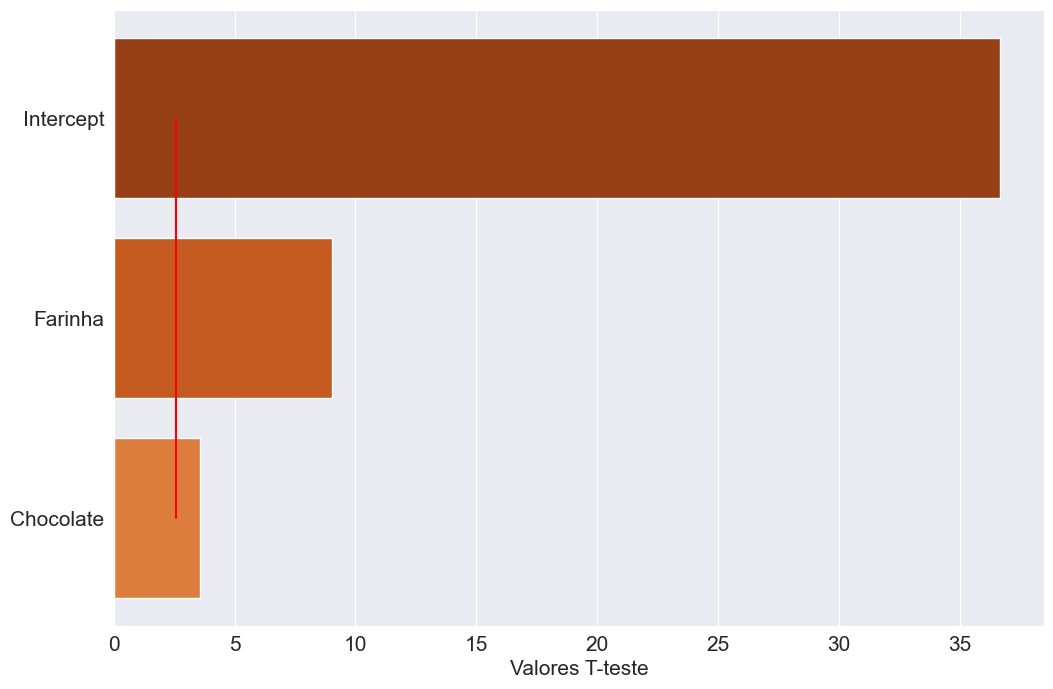

In [41]:
ax = sns.barplot(x=t_valores.values, y=t_valores.index)
ax.plot(t_limite, t_valores.index, color='r')
ax.figure.set_size_inches(12,8)
ax.set_xlabel('Valores T-teste', fontsize=15)
ax.tick_params(labelsize=15)


Os 3 parâmetros são estatisticamente significativos

<font color='red' style='font-size: 30px;'> Preditos por observados  </font>
<hr style='border: 2px solid red;'>

In [42]:
observados = experimentos['Porcoes']

In [43]:
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: Porcoes, dtype: int64

### .

In [44]:
previstos = modelo_2_adaptado.predict()

In [45]:
previstos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

### .

In [46]:
from matplotlib import pyplot as plt

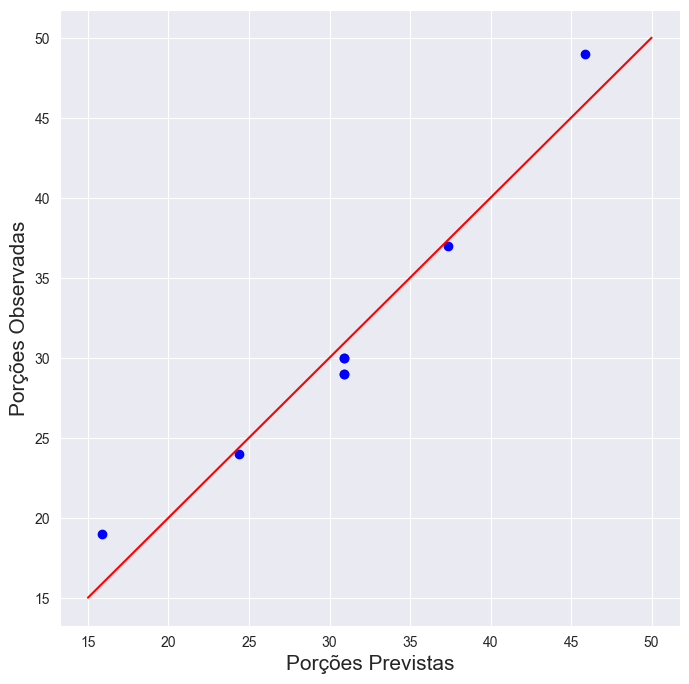

In [56]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(y=observados, x=previstos, color='b')
ax.set_ylabel('Porções Observadas', fontsize=15)
ax.set_xlabel('Porções Previstas', fontsize=15)

linha = [i for i in range(15,51)]
ax.plot(linha, linha, color='r')



<hr>

In [58]:
print(modelo_2_adaptado.summary())
# Note que R² (coeficiente de determinação) está bem próximo de 1
# O teste F (Prob F-statistic), um teste para as váriaveis de forma global, é inferior a 0.05. Assim como os testes t para cada váriavel individualmente.

                            OLS Regression Results                            
Dep. Variable:                Porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Mon, 19 Sep 2022   Prob (F-statistic):           0.000571
Time:                        11:03:57   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

c:\Users\leona\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### .

# <font color = 'purple'> Explorando o modelo   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>

In [60]:
parametros = modelo_2_adaptado.params

In [61]:
parametros

Intercept    30.875
Farinha      10.750
Chocolate     4.250
dtype: float64

### .

### Definindo a função

In [126]:
def modelo_receita(x_f, x_c):
    #Primeiro normalizamos os parâmetros para poderem ser usados em kg
    x_f_normalizado = np.interp(x=x_f, xp=[0.5, 1.5], fp=[-1, 1])
    x_c_normalizado = np.interp(x=x_c, xp=[0.1, 0.5], fp=[-1,1])
    
    porcoes = parametros['Intercept'] + parametros['Farinha']*x_f_normalizado + parametros['Chocolate']*x_c_normalizado
    
    return(round(porcoes))

In [127]:
x_f = float(input('Quantidade de farinha (kg): '))
x_c = float(input('Quanridade de chocolate (Kg): '))
print(f'#farinha {x_f}kg \n#chocolate {x_c}kg \nCom as quantidades acima esperamos a produção de {modelo_receita(x_f,x_c)} cupcakes')

#farinha 1.0kg 
#chocolate 0.5kg 
Com as quantidades acima esperamos a produção de 35 cupcakes



<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_22.png'> 


<hr>

# <font color = 'purple'> Mapa de cores   </font>


<p style='margin: 30px 30px;'>
    
<hr style = 'border: 1px solid purple;'>


<p style='margin: 150px 150px;'>


<hr>

<img width='700px' src='figuras/Figura_23.jpg'> 

#### Fonte: National Centers for Environmental Prediction


<hr>



<p style='margin: 50px 50px;'>




<p style='margin: 150px 150px;'>


<hr>

<img width='600px' src='figuras/Figura_24.png'> 


<hr>



<p style='margin: 30px 30px;'>

In [75]:
x_farinha = np.linspace(start=0.5, stop=1.5, num=10)
x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [76]:
x_chocolate = np.linspace(start=0.1, stop=0.5, num=10)
x_chocolate

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

### . 

In [131]:
y_porcoes = []
for cont_2 in x_chocolate:
    temp = []
    for cont_1 in x_farinha:
        temp.append(modelo_receita(cont_1, cont_2))
    y_porcoes.append(temp)

In [132]:
y_porcoes

[[16, 18, 21, 23, 25, 28, 30, 33, 35, 37],
 [17, 19, 22, 24, 26, 29, 31, 34, 36, 38],
 [18, 20, 23, 25, 27, 30, 32, 34, 37, 39],
 [19, 21, 23, 26, 28, 31, 33, 35, 38, 40],
 [20, 22, 24, 27, 29, 32, 34, 36, 39, 41],
 [21, 23, 25, 28, 30, 33, 35, 37, 40, 42],
 [22, 24, 26, 29, 31, 33, 36, 38, 41, 43],
 [22, 25, 27, 30, 32, 34, 37, 39, 42, 44],
 [23, 26, 28, 31, 33, 35, 38, 40, 43, 45],
 [24, 27, 29, 32, 34, 36, 39, 41, 43, 46]]

### .

### Construindo a superfície de resposta

In [109]:
import matplotlib.cm as cm

https://matplotlib.org/users/colormaps.html

<a list of 7 text.Text objects>

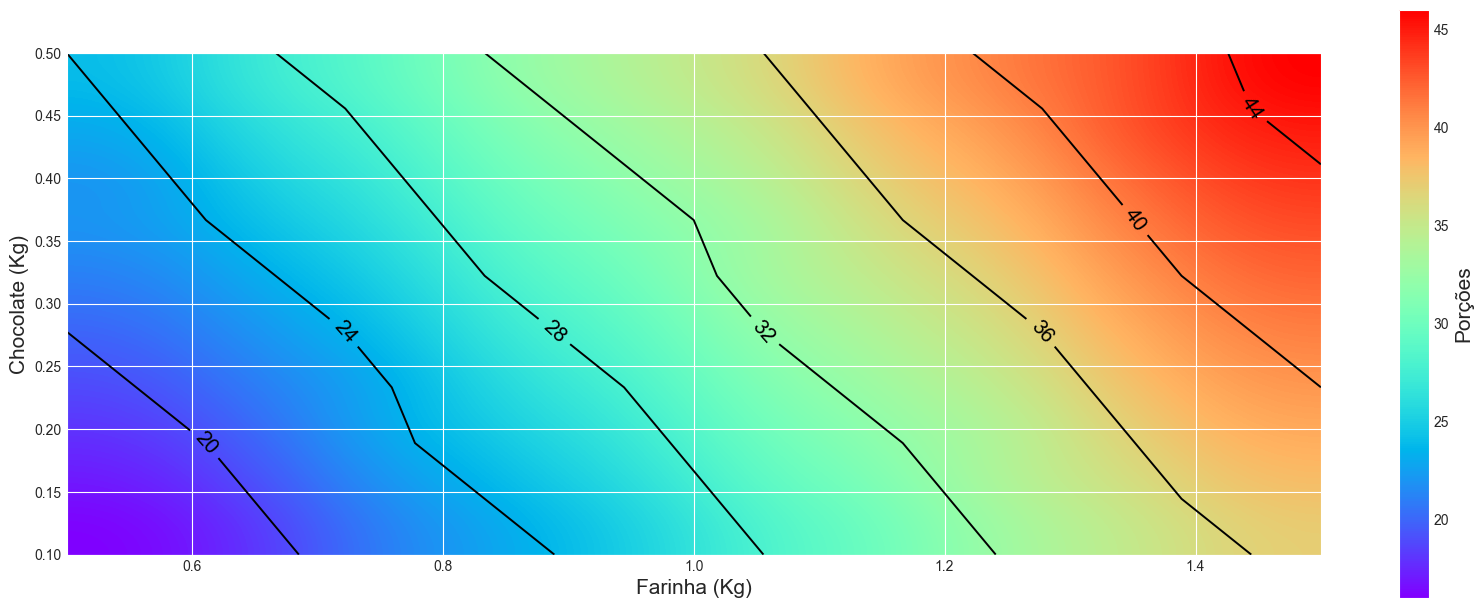

In [137]:
plt.figure(figsize=(16,6))
plt.xlabel('Farinha (Kg)', fontsize=15)
plt.ylabel('Chocolate (Kg)', fontsize=15)
plt.grid(True)

#Mapa de Cor
mapa_cor = plt.imshow(X=y_porcoes, cmap=cm.rainbow, interpolation='quadric', extent=[0.5, 1.5, 0.1, 0.5], origin='lower')

#Barra de Cor
plt.colorbar().set_label('Porções', fontsize=15)

#Isolinhas
isolinhas = plt.contour(x_farinha, x_chocolate, y_porcoes, colors='k', linewidths=1.4)
plt.clabel(CS=isolinhas, inline=True, fontsize=15, inline_spacing=10)
